# PUBG Finish Placement Prediction

# INTRODUCTION

# PUBG Finish Placement Prediction



## What is Machine Learning
Machine learning, at its core, is the study of algorithms that automate knowledge acquisition through experience. These algorithms "learn" from large datasets, identifying patterns and relationships without explicit programming. This learned knowledge enables them to perform tasks such as prediction, classification, and pattern recognition on new, unseen data with increasing accuracy over time. Essentially, it empowers computers to learn from examples and improve their performance continuously, mimicking the way humans acquire skills.

## About PUBG
PlayerUnknown's Battlegrounds (PUBG) is a popular online multiplayer battle royale game known for its intense survival gameplay. Developed by PUBG Corporation, it features up to 100 players fighting for survival on a shrinking map. Players must scavenge for weapons and resources, with the last one standing or team remaining declared the winner. PUBG's realistic graphics and dynamic gameplay have made it a significant title in the battle royale genre, attracting attention from both casual gamers and esports enthusiasts. For machine learning students, analyzing player behavior and predicting in-game outcomes could be intriguing applications within the realm of data science and analytics.

PUBG Mobile had accumulated around 1.3 billion downloads

## Purpose of this Project

This project aims to predict player placement in PUBG, the intense battle royale game. By crunching match data and deploying various machine learning algorithms, we'll unveil the key factors behind player success, build and compare predictive models, and ultimately crown the champion algorithm for accurately forecasting final rankings. Stay tuned as we navigate through data, train models, and declare the MVP in the arena of PUBG prediction!

## Outline
I. Data Gathering:

II. Exploratory Data Analysis (EDA):

III. Feature Engineering:

IV. Model Training and Evaluation:

V. Results and Analysis:

VI. Conclusion and Future Work:


# DATA GATHERING

*   Install Required Libraries
*   Download Dataset From Kaggle
*   View Dataset Files
*   Load Training Dataset with Pandas
*   Load Test Dataset with Pandas

##  Install Required Libraries

In [73]:
!pip install opendatasets pandas numpy matplotlib seaborn plotly scikit_learn --quiet

In [74]:
# To Download DataSet From Online Sources
import opendatasets as od

# working with files
import os

# To Working with Dataframe
import pandas as pd
import numpy as np

# ploting Graphs
import matplotlib. pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud

# for Pre_Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Error calculation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score

# Save Model
import joblib

## Download the Dataset



In [75]:
dataset_url = "https://www.kaggle.com/competitions/pubg-finish-placement-prediction/overview"
od.download(dataset_url)


raw_train_df = pd.read_csv("/content/pubg-finish-placement-prediction/train_V2.csv")
raw_test_df = pd.read_csv("/content/pubg-finish-placement-prediction/test_V2.csv")


# convert to .feather file
raw_train_df.to_feather("pubg_train.feather")
raw_test_df.to_feather("pubg_test.feather")


# read .feather file
pubg_train = pd.read_feather("pubg_train.feather")
pubg_test = pd.read_feather("pubg_test.feather")


csv_file_size= os.path.getsize("/content/pubg-finish-placement-prediction/train_V2.csv")/(1024*1024)
feather_file_size = os.path.getsize("/content/pubg_train.feather")/(1024*1024)
print("CSV", feather_file_size, "MB")
print("Feather", feather_file_size, "MB")
print("Difference in Size is:", round((csv_file_size - feather_file_size),2), "MB")


percentage =10
# Comment this line for Entire dataset
pubg_train = pubg_train.sample(frac=(percentage/100))
pubg_test = pubg_test.sample(frac=(percentage/100))


print("Train", pubg_train.shape)
print("Test", pubg_test.shape)

Skipping, found downloaded files in "./pubg-finish-placement-prediction" (use force=True to force download)
CSV 459.8618412017822 MB
Feather 459.8618412017822 MB
Difference in Size is: 169.12 MB
Train (444697, 29)
Test (193417, 28)


## Data Cleaning

In [78]:
# Removing missing data rows
pubg_train.dropna(subset="winPlacePerc",  inplace=True)

useful_columns = ['matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc']

pubg_train = pubg_train[useful_columns]

# Rename column
pubg_train.rename(columns={'DBNOs': 'DownButNotOut'}, inplace=True)
pubg_test.rename(columns={'DBNOs': 'DownButNotOut'}, inplace=True)

<ipython-input-78-936cc4b4312d>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# EDA

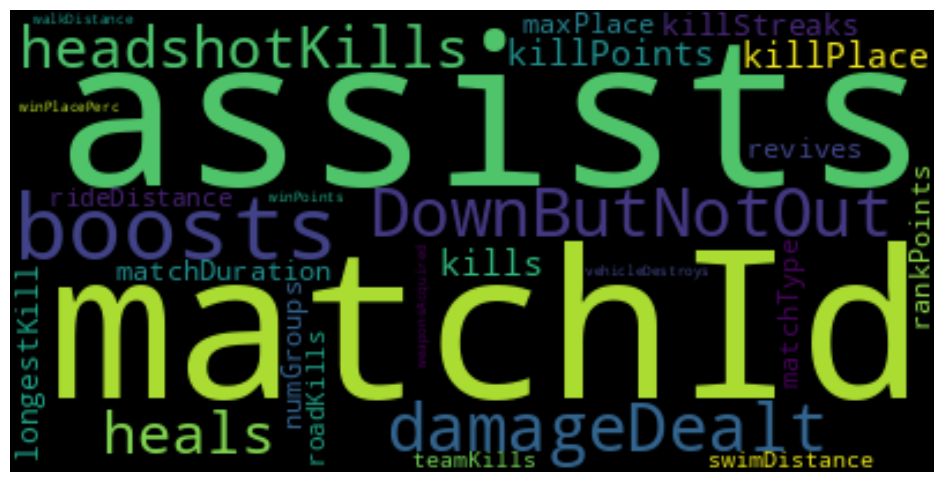

In [ ]:
columns_text = ' '.join(pubg_train.columns)

# Generate the word cloud
wordcloud = WordCloud(background_color='black').generate(columns_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

* Ride distance, Walk Distance, Swim Distance

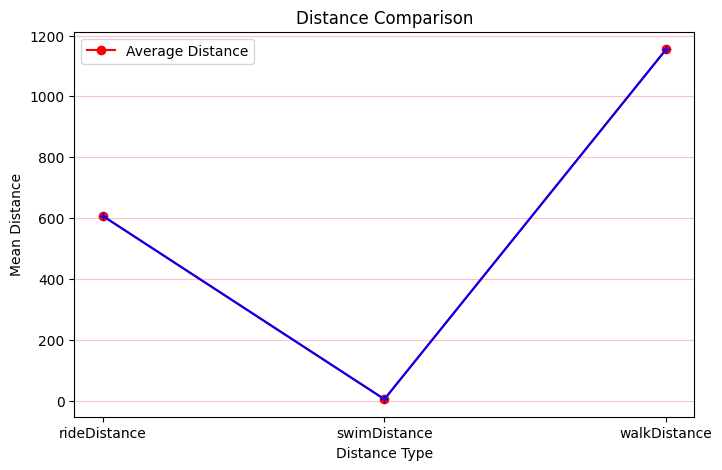

In [ ]:
distance_df = pubg_train[["rideDistance", "swimDistance", "walkDistance"]].mean()


plt.plot(distance_df, marker="o", c="red")
plt.plot(distance_df, marker="+", c="blue")

plt.title('Distance Comparison')
plt.xlabel('Distance Type')
plt.ylabel('Mean Distance')
plt.legend(["Average Distance"])
plt.grid(axis = "y", c="pink")

plt.show()

In [ ]:
kill_df = pubg_train[["kills", "headshotKills", "assists"]].sum()
kill_df = pd.DataFrame(kill_df, columns=["count"])
kill_df.reset_index(inplace=True)

# Create the pie chart
fig_kill = px.pie(kill_df,
              names="index",
              values="count",
             )

fig_kill.update_layout( title="Kills Distribution",
                       title_x=0.45,
                        title_font_family="Times New Roman",
                    title_font_color="black",
                    title_font_size= 30,
                        legend_title = "Kill Type"
                        )

fig_kill.update_traces(textposition='inside', textinfo='value+label',
                      marker=dict(line=dict(color='#000000', width=0.1))
                      )

fig_kill.show()


In [ ]:
game_df = pubg_train[['matchDuration','numGroups', 'matchType']]


match_duration = px.scatter(game_df, x='matchDuration', y='numGroups', color = 'matchType')

match_duration.update_layout(title = "Match",  title_x=0.45,
                    title_font_family="Times New Roman",
                    title_font_color="black",
                    title_font_size= 30,
                    legend_title = "Match Type")

match_duration.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
match_type_counts = game_df["matchType"].value_counts()
match_type_counts = match_type_counts.sort_values(ascending=False).head(10)

match_type = px.bar(match_type_counts, x=match_type_counts.index, y=match_type_counts,
                    labels={'y': 'Frequency', 'x': 'Match Type'},
                    title='Distribution of Match Types',
                    height=600,
                    width=800)

match_type.show()

In [ ]:
s_matrix = px.scatter_matrix(pubg_train, dimensions=["damageDealt", "killPoints", "winPlacePerc", "matchDuration"])

s_matrix.update_layout(title = "Scatter Matrix Chart",  title_x=0.45,
                    title_font_family="Times New Roman",
                    title_font_color="black",
                    title_font_size= 30,
                       )

s_matrix.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
correlation_matrix = pubg_train.corr()

# Create the correlation heatmap
corr = px.imshow(correlation_matrix, labels=dict(color="Correlation"), x=correlation_matrix.index, y=correlation_matrix.columns, color_continuous_scale="Viridis")

# Customize the layout
corr.update_layout(title="Correlation Heatmap of pubg_train DataFrame",
                  title_font_family="Times New Roman",
                    title_font_color="black",
                    title_font_size= 30,
                  )

# Show the plot
corr.show()

<ipython-input-41-e3e1d0c825a1>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
def preprocessing():

  # Train / Validation / Test Split
  pubg_train, pubg_val = train_test_split(pubg_train, test_size=0.2, random_state=42)
  print("Training: ", pubg_train.shape)
  print("Val: ", pubg_val.shape)


  # Select Input/ Target Columns
  input_cols = list(pubg_train.columns)[1:-1]
  target_cols = ['winPlacePerc']

  train_inputs = pubg_train[input_cols]
  train_targets = pubg_train[target_cols]

  val_inputs = pubg_val[input_cols]
  val_targets = pubg_val[target_cols]
  test_inputs = pubg_test[input_cols]

  print("Training", train_inputs.shape)
  print("Val", val_inputs.shape)
  print("Test", test_inputs.shape)


  # Select Numaric / Categorical Columns
  numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
  categorical_cols = train_inputs.select_dtypes('object').columns.tolist()


  # Scaling
  scaler = MinMaxScaler()
  scaler.fit(train_inputs[numeric_cols])

  train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
  val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
  test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])


  # One Hot Encoding
  encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
  encoder.fit(pubg_train[categorical_cols])

  encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

  val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
  test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

  X_train_inputs = train_inputs[numeric_cols + encoded_cols]
  X_val_inputs = val_inputs[numeric_cols + encoded_cols]
  X_test_inputs = test_inputs[numeric_cols + encoded_cols]


  # Can save work to csv parquet is more efficient in storing
  X_train_inputs.to_parquet('train_inputs.parquet')
  X_val_inputs.to_parquet('val_inputs.parquet')
  X_test_inputs.to_parquet('test_inputs.parquet')

  pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
  pd.DataFrame(val_targets).to_parquet('val_targets.parquet')

  X_train = pd.read_parquet('train_inputs.parquet')
  X_val = pd.read_parquet('val_inputs.parquet')
  X_test = pd.read_parquet('test_inputs.parquet')
  train_targets = pd.read_parquet('train_targets.parquet')
  val_targets = pd.read_parquet('val_targets.parquet')

# Pre Processing

*   ## Input / Target columns
*   ## Split into Train-Test-Validation datasets
*   ## Imputing
*   ## Compute Scaling Parameters on the Training Set
*   ## Scaling
*   ## One Hot Encoding

## Train / Validation / Test Split


In [79]:
# Train / Validation / Test Split
pubg_train, pubg_val = train_test_split(pubg_train, test_size=0.2, random_state=42)
print("Training: ", pubg_train.shape)
print("Val: ", pubg_val.shape)

Training:  (355757, 27)
Val:  (88940, 27)


## Select Input/ Target Columns

In [80]:
 # Select Input/ Target Columns
input_cols = list(pubg_train.columns)[1:-1]
target_cols = ['winPlacePerc']

train_inputs = pubg_train[input_cols]
train_targets = pubg_train[target_cols]

val_inputs = pubg_val[input_cols]
val_targets = pubg_val[target_cols]
test_inputs = pubg_test[input_cols]

print("Training", train_inputs.shape)
print("Val", val_inputs.shape)
print("Test", test_inputs.shape)

Training (355757, 25)
Val (88940, 25)
Test (193417, 25)


## Select Numaric / Categorical Columns




In [81]:
# Select Numaric / Categorical Columns
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

## Scaling

In [82]:
# Scaling
scaler = MinMaxScaler()
scaler.fit(train_inputs[numeric_cols])

train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

<ipython-input-82-8acf7061b7e7>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-82-8acf7061b7e7>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-82-8acf7061b7e7>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## One Hot Encoding

In [83]:
# One Hot Encoding
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(pubg_train[categorical_cols])

encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

X_train_inputs = train_inputs[numeric_cols + encoded_cols]
X_val_inputs = val_inputs[numeric_cols + encoded_cols]
X_test_inputs = test_inputs[numeric_cols + encoded_cols]

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

<ipython-input-83-89952b905488>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-83-89952b905488>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-83-89952b905488>:9: SettingWithCopyWarning:


A value is trying to be set on a c

## Save PreProcessed data

In [84]:
# Can save work to csv parquet is more efficient in storing
X_train_inputs.to_parquet('train_inputs.parquet')
X_val_inputs.to_parquet('val_inputs.parquet')
X_test_inputs.to_parquet('test_inputs.parquet')

pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')

In [85]:
X_train = pd.read_parquet('train_inputs.parquet')
X_val = pd.read_parquet('val_inputs.parquet')
X_test = pd.read_parquet('test_inputs.parquet')

train_targets = pd.read_parquet('train_targets.parquet')
val_targets = pd.read_parquet('val_targets.parquet')

Store .parquet file somewhere on drive.
So, don't have to download and Pre porcess it everytime.

In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
train_inputs = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/Project_3_parquet/train_inputs.parquet')
val_inputs = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/Project_3_parquet/val_inputs.parquet')
test_inputs = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/Project_3_parquet/test_inputs.parquet')

train_targets = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/Project_3_parquet/train_targets.parquet')
val_targets = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/Project_3_parquet/val_targets.parquet')

# Training the model

* Linear Regression
* Ridge Regression
* Lasso Regression
* Decision Tree
* Random Forest
* Gradient Boosting
* Suport Vector Machine


## Base model

In [88]:
# Create a Base model
class MainRegressor:
  # for training
  def fit(self, inputs, targets):
    self.mean = targets.mean()


  def predict(self, inputs):
                    #rows count , fill every rows with same value
    return (np.full(inputs.shape[0], self.mean))


mean_model = MainRegressor()

mean_model.fit(train_inputs, train_targets)
print(mean_model.mean)

print(mean_model.predict(train_inputs))
print(mean_model.predict(val_inputs))

# calculating Error
def rmse(targets, predct):
  return mean_squared_error(targets, predct, squared=False)


print("Winning Prediction on training", rmse(train_targets,mean_model.predict(train_inputs)))
print("Winning Prediction on Val", rmse(val_targets,mean_model.predict(val_inputs)))

winPlacePerc    0.472721
dtype: float64
[0.47272109 0.47272109 0.47272109 ... 0.47272109 0.47272109 0.47272109]
[0.47272109 0.47272109 0.47272109 ... 0.47272109 0.47272109 0.47272109]
Winning Prediction on training 0.3073903177283826
Winning Prediction on Val 0.30736290032689945


In [89]:
def eveluate(model):
  # training preds
  train_preds = model.predict(train_inputs)
  # training error
  train_error = rmse(train_preds, train_targets)

  # val preds
  val_preds = model.predict(val_inputs)
  # val error
  val_error = rmse(val_preds, val_targets)

  return print("Train Error: ", train_error,
          "Val Error: ", val_error)

## Liner Regression

In [90]:
# Liner Regression
model_L = LinearRegression()
model_L.fit(train_inputs, train_targets)

eveluate(model_L)

test_predict = model_L.predict(test_inputs)
print("Winning Prediction on Test", test_predict)

Train Error:  0.12301369913856573 Val Error:  0.12350676622716178
Winning Prediction on Test [[1.04046835]
 [0.22654306]
 [0.47282311]
 ...
 [0.40598114]
 [0.47214671]
 [0.87008382]]


In [91]:
# Ridge Regression
model_R = Ridge()
model_R.fit(train_inputs, train_targets)

eveluate(model_R)

Train Error:  0.12301422045955301 Val Error:  0.12350702719429124


In [92]:
# Decision Tree
model_DT = DecisionTreeRegressor(max_depth = 15, max_features = 25)
model_DT.fit(train_inputs, train_targets)

eveluate(model_DT)

print("Max_depth:", model_DT.max_depth)
print("Max_feat: ", model_DT.max_features)

Train Error:  0.07732787909590381 Val Error:  0.09840122977113178
Max_depth: 15
Max_feat:  25


In [93]:
# Random Forest
model_RF = RandomForestRegressor(max_depth = 15, n_estimators = 20)
model_RF.fit(train_inputs, train_targets)

eveluate(model_RF)

<ipython-input-93-f305ec2194d9>:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Train Error:  0.0721799302397421 Val Error:  0.08631347361507033


In [94]:
# GBM
model_GBM = XGBRegressor(n_estimators = 10, max_depth = 15)
model_GBM.fit(train_inputs, train_targets)

eveluate(model_GBM)

Train Error:  0.05854926640008462 Val Error:  0.08649251179954848


# Tune the Hyperparameters

In [95]:
def test_params(ModelClass, **params):

    model = ModelClass(**params)
    model.fit(train_inputs, train_targets)
    train_rmse = mean_squared_error(model.predict(train_inputs), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(val_inputs), val_targets, squared=False)
    return train_rmse, val_rmse

def test_param_and_plot(ModelClass, param_name, param_values, **other_params):
    train_errors, val_errors = [], []

    for value in param_values:
        params = dict(other_params)
        params[param_name] = value
        train_rmse, val_rmse = test_params(ModelClass, **params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)


    param_plot = go.Figure()

    param_plot.add_trace(go.Scatter(x=param_values, y=train_errors, mode='lines+markers', name='Training'))
    param_plot.add_trace(go.Scatter(x=param_values, y=val_errors, mode='lines+markers', name='Validation'))

    param_plot.update_layout(
        title='Overfitting curve: ' + param_name,
        xaxis=dict(title=param_name),
        yaxis=dict(title='RMSE'),
        legend=dict(x=0, y=1, traceorder='normal', orientation='h'),
        showlegend=True,
        autosize=False,
        width=800,
        height=500,
    )

    param_plot.show()

In [96]:
best_params = {
    'random_state': 42,
    'n_jobs': -1,
    'objective': 'reg:squarederror',
    'n_estimators': 250}

param_name = 'n_estimators'
param_values = [100, 250, 500]

other_params = {
    'random_state': 42,
    'n_jobs': -1,
    'objective': 'reg:squarederror'}


test_param_and_plot(XGBRegressor, param_name, param_values,  **best_params)

In [97]:
best_params = {
    'random_state': 42,
    'n_jobs': -1,
    'objective': 'reg:squarederror',
    'n_estimators': 250}

param_name = 'max_depth'
param_values = [5, 10, 15]
other_params = {
    'random_state': 42,
    'n_jobs': -1,
    'objective': 'reg:squarederror'}

test_param_and_plot(XGBRegressor, param_name, param_values,  **best_params)

In [98]:
best_params = {
    'random_state': 42,
    'n_jobs': -1,
    'objective': 'reg:squarederror',
    'n_estimators': 250,
    'max_depth': 5}

param_name = 'learning_rate'
param_values = [0.1, 0.25, 0.35,0.5]
other_params = {
    'random_state': 42,
    'n_jobs': -1,
    'objective': 'reg:squarederror'}

test_param_and_plot(XGBRegressor, param_name, param_values,  **best_params)

# Saving the Model

In [99]:
Linear_Regression_model = {
    'model': model_L,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_cols,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

Ridge_Regression_model = {
    'model': model_R,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_cols,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

Decision_Tree_model = {
    'model': model_DT,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_cols,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

Random_Forest_model = {
    'model': model_RF,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_cols,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

GBM_Regression_model = {
    'model': model_GBM,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_cols,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [100]:
# create a new file in drive. make a copy
joblib.dump(Linear_Regression_model, 'Linear_reg_model.joblib')
joblib.dump(Ridge_Regression_model, 'Ridge_reg_model.joblib')
joblib.dump(Decision_Tree_model, 'dt_reg_model.joblib')
joblib.dump(Random_Forest_model, 'rf_reg_model.joblib')
joblib.dump(GBM_Regression_model, 'gbm_reg_model.joblib')

['gbm_reg_model.joblib']

In [101]:
# Load the file when use next time
Linear_Regression_model2= joblib.load('Linear_reg_model.joblib')
Ridge_Regression_model2= joblib.load('Ridge_reg_model.joblib')
Decision_Tree_model2= joblib.load('dt_reg_model.joblib')
Random_Forest_model2= joblib.load('rf_reg_model.joblib')
GBM_Regression_model2= joblib.load('gbm_reg_model.joblib')

# Conclusion

This project successfully predicted PUBG player placement using machine learning. Random Forest excelled, demonstrating AI's potential in the domain. Future refinements like hyperparameter tuning and feature engineering promise even better results. Ultimately, this work paves the way for novel PUBG analytics and improved gameplay experiences.

## Summary


## Future Work
* HyperParameter Tuning:
* Feature Engineering:
Create new features to potentially improve prediction accuracy.
* Additional Algorithms:
Test other regression algorithms to discover potentially better-performing models.
*


## Reference
*   [Kaggle DATASET](https://www.kaggle.com/competitions/pubg-finish-placement-prediction/overview)
*   [Google](https://www.google.com/)
* [w3school](https://www.google.com/search?q=w3school+pandas&oq=&aqs=chrome.1.69i57j69i59l3j69i60l4.7770j0j4&sourceid=chrome&ie=UTF-8)
* [Jovian](https://jovian.com/learn/zero-to-data-analyst-bootcamp/lesson/advanced-data-analysis-techniques)
* [Pandas](https://pandas.pydata.org/docs/reference/frame.html)
* [Seaborn](https://seaborn.pydata.org/examples/index.html)
* [matplotlib](https://matplotlib.org/stable/plot_types/index)
* [plotly](https://plotly.com/python/)
* [Sklearn](https://scikit-learn.org/stable/)

